[toc]

# yield用法
* yield究竟是干嘛的？
* yield是怎么执行的？
* yield的好处是什么?

## 文章结构
1. 迭代器与可迭代对象
2. yield简单案例及执行步骤
3. yield中的send函数
4. yield的好处是什么

### 迭代器与可迭代对象
* 开始之前，先理解一下迭代器与可迭代对象，因为yield其实是一种特殊的迭代器，不过这种迭代器更加优雅。

* 可迭代对象

In [12]:
# 可迭代对象：列表为例
s = 'ABC'
l = list(s)
print(l)

['A', 'B', 'C']


* 迭代器

In [13]:
# 迭代器对象l1
s = 'ABC'
l = list(s)
l1 = iter(l)
print(l1)
# 取出迭代器容器中的值，没有值后就抛出异常
print(next(l1))
print(next(l1))
print(next(l1))
print(next(l1))

A
B
C


StopIteration: 

上面案例中l是一个列表，是一个可迭代对象
l1是一个迭代器，直接打印，结果是<list_iterator object at 0x0000020D793D95C0>，访问其中的值可以使用for循环或者next函数，所有值都被访问后，最后会抛出StopIteration异常

关于迭代器与可迭代对象参考我另一篇博文，里面有详细解释：
https://blog.csdn.net/u011318077/article/details/93754013
yield生成器就是一个优雅的迭代器，访问也会用到next函数，理解迭代器后可以更轻松的理解yield生成器的执行过程和原理。

### yield简单案例以及执行步骤
下面进入正题，如果你还没有对yield有个初步分认识，那么你先把yield看做“return”，
这个是直观的，它首先是个return，普通的return是什么意思，就是在程序中返回某个值，返回之后程序就不再往下运行了。看做return之后再把它看做一个是生成器（generator）的一部分
（带yield的函数才是真正的迭代器），好了，如果你对这些不明白的话，那先把yield看做return,然后直接看下面的程序，你就会明白yield的全部意思了(只是先当做return，本质向后看就会明白)。

* 先看一个普通函数

In [ ]:
# 一个普通函数：
def foo():
    print('Starting.....')
# 调用函数，直接执行语句
g = foo()
print("*" * 100)

* 生成器函数

In [ ]:
# 包含yield关键字，就变成了生成器函数
# 调用函数并不会执行语句
def foo():
    print('Starting.....')
    while True:
        res = yield 4
        print("res:", res)

# 下面调用函数并没有执行，可以先将后面的语句注释掉
# 逐行运行代码观察效果
g = foo()
print("第一次调用执行结果：")
print(next(g))
print("*" * 100)

print("第二次调用执行结果：")
print(next(g))
print("*" * 100)

* 下面解释代码运行顺序，相当于代码单步调试()：
程序开始执行以后，因为foo函数中有yield关键字，所以foo函数并不会真的执行，
而是先得到一个生成器g(相当于一个对象)，函数的一个状态，函数相当于暂停了
执行第一次调用，直到遇到next方法，foo函数正式开始执行，先执行foo函数中的print方法，然后进入while循环
程序遇到yield关键字，然后把yield想想成return,return了一个4之后，程序停止，
但是，程序只是返回了一个值4，并没有执行将4赋值给res操作，此时next(g)语句执行完成，
所以第一次调用后的结果有两行（第一个是while上面的print的结果,第二个是return出的结果）
也就是执行print(next(g))先调用函数，最后打印出了返回值4
程序执行print("" * 100)，输出100个
执行第二次调用，又开始执行下面的print(next(g)),这个时候和上面那个差不多，不过不同的是，这个时候是从刚才那个next程序停止的地方开始执行的，也就是要执行res的赋值操作语句，
这时候要注意，yield 4返回值4后就停止了，并没有赋值给前面的res, （因为刚才那个是return出去了，并没有给赋值操作的左边传参数），此时代码实际是从print(“res:”, res)开始执行，
这个时候res赋值是空，是None,所以接着下面的输出就是res:None,
程序会继续在while里执行，又一次碰到yield,这个时候同样return出4，然后程序停止，print函数输出的4就是这次return出的4.
到这里你可能就明白yield和return的关系和区别了，带yield的函数是一个生成器，而不是一个函数了，这个生成器有一个函数就是next函数，next就相当于“下一步”生成哪个数，这一次的next开始的地方是接着上一次的next停止的地方执行的，所以调用next的时候，生成器并不会从foo函数的开始执行，只是接着上一步停止的地方开始，然后遇到yield后，return出要生成的数，此步就结束。

### 总结
上面的foo()就是一个生成器函数，当一个生成器函数调用yield，生成器函数的“状态”会被冻结，所有的变量的值会被保留下来，下一行要执行的代码的位置也会被记录，就是yield这行代码结束的位置直到再次调用next()。一旦next()再次被调用，生成器函数会从它上次离开的地方开始。如果永远不调用next()，yield保存的状态就被无视了。

generator是用来产生一系列值的，yield则像是generator函数的返回结果，(yield也可以看似return)，yield唯一所做的另一件事就是保存一个generator函数的状态

yield和return的区别，return执行后会继续执行后面的代码，但是yield会停止之后的代码继续执行，注意，只是停止生成器函数内部的代码，生成器函数外部代码不受影响

generator就是一个特殊类型的迭代器（iterator）和迭代器相似，我们可以通过使用next()来从generator中获取下一个值

### yield中的send函数
yield生成器函数中另外一重要函数就是send(），可以传入一个值作为返回值，看下面案例，第二次调用时候传入数字7

In [17]:
# 包含yield关键字，就变成了生成器函数
def foo():
    print('Starting.....')
    while True:
        res = yield 4
        print("res:", res)

# 下面调用函数并没有执行，可以先将后面的语句注释掉
# 逐行运行代码观察效果
g = foo()
print("第一次调用执行结果：")
print(next(g))
print("*" * 100)

print("第二次调用执行结果(传入参数)：")
print(g.send(7))
print("*" * 100)

print("第三次调用执行结果：")
print(next(g))
print("*" * 100)

第一次调用执行结果：
Starting.....
4
****************************************************************************************************
第二次调用执行结果(传入参数)：
res: 7
4
****************************************************************************************************
第三次调用执行结果：
res: None
4
****************************************************************************************************


* send函数的概念：003案例中第二次调用时res的值为什么是None，这个变成了7，到底为什么?
* 这是因为，send是发送一个参数给res的，因为上面讲到，return的时候，并没有把4赋值给res，下次执行的时候只好继续执行赋值操作，只好赋值为None了，而如果用send的话，开始执行的时候，先接着上一次（return 4之后）执行，先把7赋值给了res,然后执行next的作用，遇见下一回的yield，return出结果后结束（return的结果都是4，每次代码最后的结果都是4）。
* 上面代码执行步骤：
    1. 程序执行g.send(7)，程序会从yield关键字那一行继续向下运行，send会把7这个值赋值给res变量
    2. 由于send方法中包含next()方法，所以程序会继续向下运行执行print方法，然后再次进入while循环
    3. 程序执行再次遇到yield关键字，yield会返回后面的值后，程序再次暂停，直到再次调用next方法或send方法。

#### 深层次补充：(上面的案例描述只是为了容易理解，描述为暂停和赋值)
* 比如说“send方法中包含next()”send先赋值然后在执行next，从一些代码直观上来讲好像是这样，但其实并不是，
* 第一，其实并不是赋值，
* 第二，底层send和next其实都是调用gen_send_ex(PyGenObject *gen,PyObject *arg,int exc)这个函数，只是第二个参数不一样，send也不一定要带参数，尤其是第一次使用send来启动生成器，send带参数还是不允许的。
* 如果对中断了解的话，其实不要把这个当成return来看，因为根本就不是，应该当成中断来理解，
* 因为底层的实现就是中断的原理，保存栈帧，加载栈帧。

### yield的好处是什么？
通过上面的阅读和敲代码已经理解了什么是yield，和整个执行原理都应该很清楚了，单究竟为什么要使用yield，而不是用return？？？
我们以列表list为例，为什么用这个生成器，是因为如果用List的话，会占用更大的空间， 比如说取0,1,2,3,4,5,6…1000，下面举例，只取到10,1000结果太长了

In [18]:
for n in range(10):
    a=n
    print(a) # 相当于return a
print("*" * 100)

0
1
2
3
4
5
6
7
8
9
****************************************************************************************************


##### 生成器实现上面的功能

In [19]:
# 生成器实现
def foo(num):
    print("starting...")
    while num<10:
        num=num+1
        yield num

for n in foo(0):
    print(n)

starting...
1
2
3
4
5
6
7
8
9
10


* 上面两种方式都可以得到0-10之间的数字，但是占用内存不同：

* 第一种直接使用for循环：for循环运行时，所有的0-10之间数字都存在内存之中需要消耗极大的内存，如果数字是10000，可能for循环直接就将电脑内存消耗完了后面的代码，其它程序就无内存可用了

* 第二种，虽然也是for循环，但是内部加入了yield：for循环每次调用时，yield生成器(generator)能够迭代的关键是它有一个next()方法，工作原理就是通过重复调用next()方法，直到捕获一个异常,for循环自动结束

* 每次执行到yield，因为底层的实现就是中断的原理，保存栈帧，加载栈帧。 每次执行结束内存释放，执行的时候占用一点内存，消耗的内存资源就很少

* 上面for循环执行过程，并没有写next函数，其实自动调用的next函数(参考迭代器与迭代对象中详细解释)：

* for循环执行过程：
    1. 调用可迭代对象的__iter__方法返回一个迭代器对象（iterator）
    2. 不断调用迭代器的__next__方法返回元素
    3. 直到迭代完成后，处理StopIteration异常


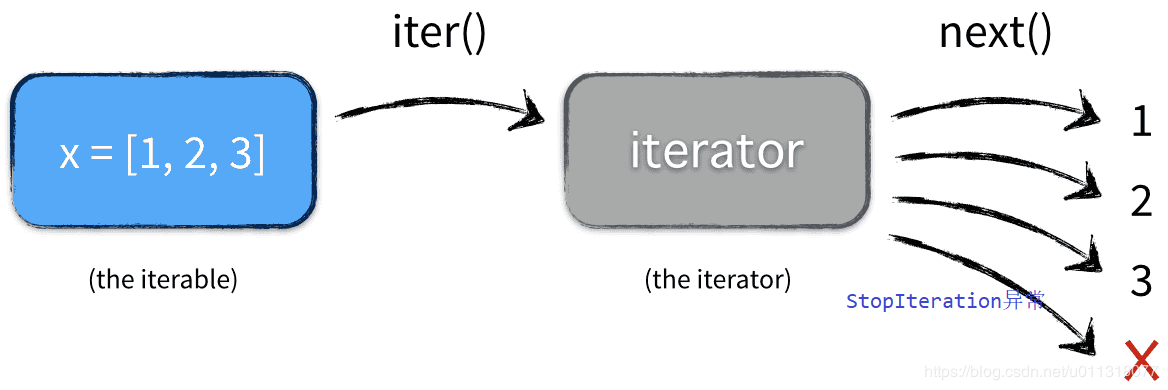

### yield的好处总结：
    1. 不会将所有数据取出来存入内存中；而是返回了一个对象；可以通过对象获取数据；用多少取多少，可以节省内容空间。
    2. 除了能返回一个值，还不会终止循环的运行；
    3. 每次执行到yield，因为底层的实现就是中断的原理，保存栈帧，加载栈帧。
    4. 每次执行结束内存释放，执行的时候占用一点内存，消耗的内存资源就很少

#### 补充：
    * 通常yield都是放在一个函数中，该函数就变成了生成器函数，该函数就变成了一个迭代器
    * 生成器函数一般都是通过for循环调用，for循环自带next方法
    * 分布式爬虫会经常使用yield,yield直接放在for循环的内部
    * **爬虫代码运行时候，for循环自动调用next方法，yield就会不断执行，直到爬取结束**
    * **使用yield也会大大减少爬虫运行时候的内存消耗**